# Exploratory Analysis of the World Happiness Dataset

This project explores global happiness scores and their relationship to key socioeconomic indicators using exploratory data analysis (EDA).

The goals of this analysis are to:
- Understand the distribution of happiness scores
- Examine relationships between happiness and socioeconomic variables
- Explore regional differences
- Produce a cleaned dataset for downstream reporting in Power BI

## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 2. Data Loading & Inspection

In [2]:
# Load dataset
df = pd.read_csv("../data/raw/happiness.csv")

# Preview
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


The dataset contains country-level happiness scores along with economic, social, and governance indicators.

## 3. Initial Data Inspection

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.559417e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


We inspect data types, summary statistics, and potential missing values to determine cleaning requirements.

## 4. Data Cleaning & Preparation

To prepare the dataset for analysis and reporting:
- Selected relevant columns
- Renamed variables for clarity and consistency
- Removed rows with missing key variables

In [4]:
# Remove missing values for relevant columns
df_clean = df.dropna()

# Rename columns for Power BI model
df_clean = df_clean.rename(columns={
    "Ladder score": "Happiness score",
    "Perceptions of corruption": "Corruption",
    "Logged GDP per capita": "GDP (log)",
    "Freedom to make life choices": "Freedom",
})

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Happiness score                             153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   GDP (log)                                   153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom                                     153 non-null    float64
 10  Generosity    

In [5]:
# Create column name variables
country_col = "Country name"
region_col = "Regional indicator"
score_col = "Happiness score"
gdp_col = "GDP (log)"

## 5. Distribution of Happiness Scores

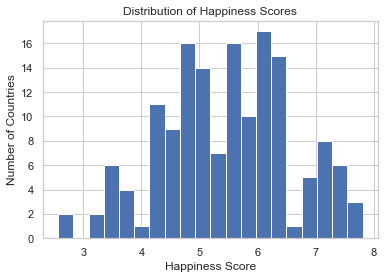

In [6]:
plt.hist(df_clean[score_col], bins=20)
plt.xlabel("Happiness Score")
plt.ylabel("Number of Countries")
plt.title("Distribution of Happiness Scores")
plt.show()

Happiness scores are concentrated between approximately 4.5 and 6.5, with relatively few extreme low or high values.

## 6. Top 10 Happiest Countries

In [7]:
# Determine the top 10 happiest countries
df_clean.sort_values(score_col, ascending=False)
df_top_ten = df_clean[0:9]

print(df_top_ten[[country_col, score_col]])

  Country name  Happiness score
0      Finland           7.8087
1      Denmark           7.6456
2  Switzerland           7.5599
3      Iceland           7.5045
4       Norway           7.4880
5  Netherlands           7.4489
6       Sweden           7.3535
7  New Zealand           7.2996
8      Austria           7.2942


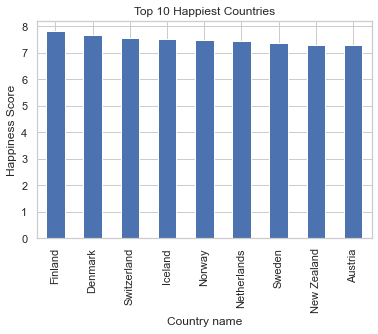

In [8]:
df_top_ten.set_index(country_col)[score_col].plot(kind="bar")
plt.ylabel("Happiness Score")
plt.title("Top 10 Happiest Countries")
plt.show()

## 7. Regional Comparison

In [9]:
region_avg = df_clean.groupby(region_col)[score_col].mean().sort_values(ascending=False)
region_avg

Regional indicator
North America and ANZ                 7.173525
Western Europe                        6.899219
Latin America and Caribbean           5.981786
Central and Eastern Europe            5.883818
East Asia                             5.714850
Southeast Asia                        5.383367
Commonwealth of Independent States    5.358342
Middle East and North Africa          5.227159
South Asia                            4.475443
Sub-Saharan Africa                    4.383495
Name: Happiness score, dtype: float64

In [10]:
df_clean.groupby("Regional indicator")["Happiness score"].describe()

,count,mean,std,min,25%,50%,75%,max
Regional indicator,,,,,,,,
Central and Eastern Europe,17.0,5.883818,0.523486,4.8827,5.546100,6.00040,6.215500,6.9109
Commonwealth of Independent States,12.0,5.358342,0.536527,4.5607,5.008525,5.54070,5.568650,6.2576
East Asia,6.0,5.714850,0.459451,5.1239,5.469750,5.69060,5.872000,6.4554
Latin America and Caribbean,21.0,5.981786,0.660213,3.7208,5.796800,6.13710,6.348300,7.1214
Middle East and North Africa,17.0,5.227159,0.988163,3.5274,4.633400,5.00510,6.102100,7.1286
North America and ANZ,4.0,7.173525,0.159661,6.9396,7.152000,7.22745,7.248975,7.2996
South Asia,7.0,4.475443,1.083878,2.5669,3.950150,4.83280,5.167400,5.6933
Southeast Asia,9.0,5.383367,0.656866,4.3080,4.888600,5.35350,5.998800,6.3771
Sub-Saharan Africa,39.0,4.383495,0.683051,2.8166,3.850850,4.43200,4.821700,6.1013


Regional summary statistics indicate meaningful variation in median happiness scores and dispersion between geographic regions.

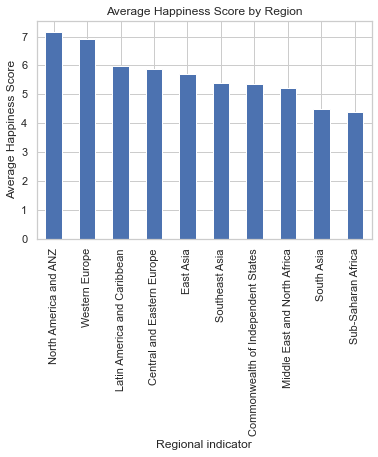

In [11]:
region_avg.plot(kind="bar")
plt.ylabel("Average Happiness Score")
plt.title("Average Happiness Score by Region")
# plt.xticks(rotation=75)
plt.show()


Western Europe and North America tend to report higher average hapiness scores compared to South Asia and Sub-Saharan Africa.

## 8. Correlation Analysis

In [12]:
key_factors = [
    "GDP (log)",
    "Social support",
    "Healthy life expectancy",
    "Freedom",
    "Generosity",
    "Corruption"
]

corr = df_clean[[score_col] + key_factors].corr()[score_col].sort_values(ascending=False)
corr


Happiness score            1.000000
GDP (log)                  0.775374
Healthy life expectancy    0.770316
Social support             0.765001
Freedom                    0.590597
Generosity                 0.069043
Corruption                -0.418305
Name: Happiness score, dtype: float64

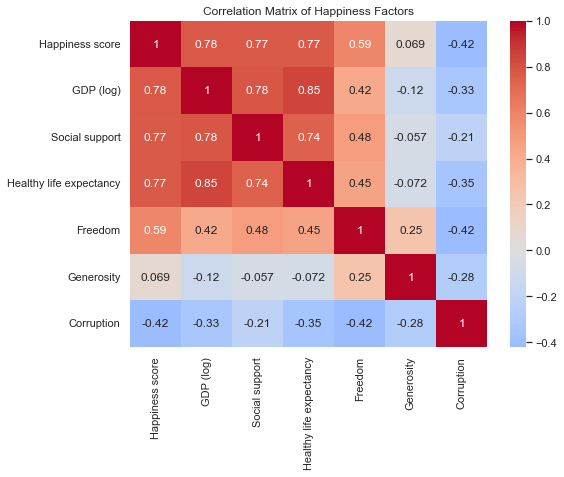

In [13]:
corr_matrix = df_clean[[score_col] + key_factors].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Happiness Factors")
plt.show()

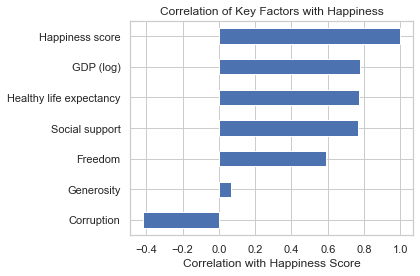

In [14]:
corr.sort_values().plot(kind="barh")
plt.xlabel("Correlation with Happiness Score")
plt.title("Correlation of Key Factors with Happiness")
plt.tight_layout()
plt.show()


GDP (log) shows a strong positive correlation (r ≈ 0.78), suggesting economic prosperity is closely associated with higher national happiness scores. Social support, and healthy life expectancy show similar strong positive correlations with happiness (~0.77).
Perceptions of corruption show a moderate negative correlation.
Freedom shows a moderate positive relationship.

## 9. Limitations

- Correlation does not imply causation.
- Dataset is cross-sectional and does not account for temporal effects.
- Some variables may be collinear (e.g., GDP and life expectancy).

## 10. Export Processed Dataset

In [15]:
from pathlib import Path

output_dir = Path("../data/processed")
output_dir.mkdir(parents=True, exist_ok=True)

df_clean.to_csv(output_dir / "happiness_clean.csv", index=False)

## 11. Summary of Findings

- Happiness scores cluster between 4.5 and 6.5 globally.
- GDP (log), social support, and life expectancy are strongly correlated with happiness.
- Corruption shows a moderate negative relationship.
- Regional variation suggests additional cultural or structural influences.